# Problem 3.3 Learning From Data

In [11]:
from matplotlib import pyplot as plt
import numpy as np
import random
from random import seed

# Visualizing the dataset

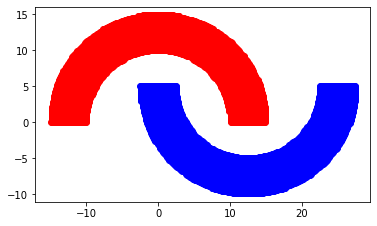

In [12]:
thk = 5
sep = -5
rad = 10

xs_red = []
ys_red = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

for x_coord in np.arange(-(rad+thk),rad+thk,0.15):
    for y_coord in np.arange(0 ,rad+thk,0.15):
        if rad**2 <= (x_coord - 0)**2 + (y_coord - 0)**2 <= (rad+thk)**2:
            xs_red.append(x_coord)
            ys_red.append(y_coord)

xs_blue = []
ys_blue = []

for x_coord in np.arange(-(thk/2),(thk/2 + (2*rad) + thk),0.15):
    for y_coord in np.arange(-sep ,-(rad++sep+thk),-0.15):
        if rad**2 <= (x_coord - ((thk/2) + rad))**2 + (y_coord - (-sep))**2 <= (rad+thk)**2:
            xs_blue.append(x_coord)
            ys_blue.append(y_coord)


plt.scatter(xs_red, ys_red,color = 'red')
plt.scatter(xs_blue, ys_blue,color = 'blue')
plt.show()

# PLA Algorithm

In [13]:
"""
A function for prediction of Y
"""
def Y_predict(x_vector,w):
    x_new = [1]
    for i in x_vector:
        x_new.append(i)
    x_new = np.array((x_new))
    res = (np.dot(x_new,w))
    if res > 0:
        Y = 1
        return Y
    elif res < 0:
        Y = -1
        return Y
    elif res ==0:
        Y = 0
        return Y

"""
The main training function for the data, with the 
Attributes
----------

X - The data set
iterations - the number of times the weights are iterated
eta - the learning rate
"""
def train(X,iterations,eta):
    global count
    global w
    global all_combined_targets
    for y_idx in range (len(X)):
        ran_num = random.randint(0,len(X)-1)
        x_train = X[ran_num]
        y_t = Y_predict(x_train,w)
        misrepresented_list = []
        for i,j in enumerate(all_combined_targets):
            if j!=y_t:
                misrepresented_list.append(i)
        if len(misrepresented_list)==0:
            print('Full accuracy achieved')
            break
        random_selection = random.randint(0,len(misrepresented_list)-1)
        random_index = misrepresented_list[random_selection]
        x_selected = X[random_index]
        y_selected = all_combined_targets[random_index]
        x_with1 = [1]
        for i in x_selected:
            x_with1.append(i)
        x_with1 = np.array((x_with1))
        s_t = np.matmul(w,x_with1)
        if (y_selected*s_t)<=1:
            w = w+(eta*(y_selected-s_t)*x_with1)
        if (count==iterations):
            print('maximum iterations reached in the training block')
            break
            count+=1

In [14]:
xs_red = np.array(xs_red)
ys_red = np.array(ys_red)
xs_blue = np.array(xs_blue)
ys_blue = np.array(ys_blue)
points_1 = []
res1 = []
for i in range(len(xs_red)):
    points_1.append([xs_red[i],ys_red[i]])
    res1.append(-1)
points_1 = np.array(points_1)

points_2 = []
res2 = []
for i in range(len(xs_blue)):
    points_2.append([xs_blue[i],ys_blue[i]])
    res2.append(1)
points_2 = np.array(points_2)
all_input = np.concatenate((points_1, points_2)) #creating a combined dataset
all_d = np.concatenate((res2,res1))

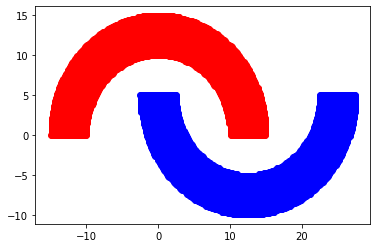

In [15]:
#Visualizing the linearly separable dataset
plt.scatter(xs_red, ys_red, color='red')
plt.scatter(xs_blue,ys_blue, color='blue')
length_dataset = len(xs_red)
d1 = -1 * (np.ones(int(length_dataset/2)))
d2 = np.ones(int(length_dataset/2))
all_combined_targets = np.concatenate((d2,d1))

# WARNING! Running the below snippet of code, will not reach an end.  This is how the PLA would react in this case, hence the next two blocks haven't been executed.

# Answer (a) This showcases that the PLA will keep running for infinite time, without reaching an end.

In [ ]:
#initializing all parameters
count = 0
# w0 = random.randint(1,4)
# w1 = random.randint(1,4)
# w2 = random.randint(1,4)
w0,w1,w2 = 0,0,0
w = np.array((w0,w1,w2))
weight= 0
iterations = 100
eta = 0.01
#calling the function
train(all_input,iterations,eta)

In [ ]:
#Visualizing the linearly separable dataset after
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.scatter(xs_red, ys_red, color='red')
plt.scatter(xs_blue,ys_blue, color='blue')
m = -(w[1]/w[2])
c = -(w[0]/w[2])
plt.plot( m*all_input + c,all_input ,'g--')
plt.xlim([-20, 30])
plt.ylim([-30, 20])

# Answer (b) Pocket Algorithm

In [16]:
#to reset all the varaible.s ONLY TO BE RUN IF YOU HAVE RUN THE CODES BEFORE THIS
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn import linear_model
from random import seed
np.random.seed(1)

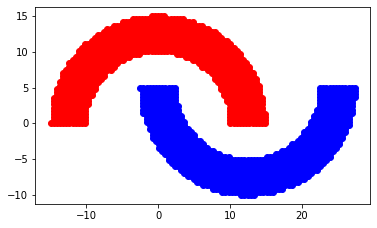

In [18]:
thk = 5
sep = -5
rad = 10

xs_red = []
ys_red = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

step= 0.44
for x_coord in np.arange(-(rad+thk),rad+thk,step):
    for y_coord in np.arange(0 ,rad+thk,step):
        if rad**2 <= (x_coord - 0)**2 + (y_coord - 0)**2 <= (rad+thk)**2:
            xs_red.append(x_coord)
            ys_red.append(y_coord)
            
xs_blue = []
ys_blue = []

for x_coord in np.arange(-(thk/2),(thk/2 + (2*rad) + thk),step):
    for y_coord in np.arange(-sep ,-(rad++sep+thk),-step):
        if rad**2 <= (x_coord - ((thk/2) + rad))**2 + (y_coord - (-sep))**2 <= (rad+thk)**2:
            xs_blue.append(x_coord)
            ys_blue.append(y_coord)


plt.scatter(xs_red, ys_red,color = 'red')
plt.scatter(xs_blue, ys_blue,color = 'blue')
plt.show()

In [19]:
# dataset preparation
x_combined = xs_red +xs_blue
y_combined = ys_red + ys_blue
y_train_1  = np.ones((len(xs_red), ), dtype=np.float)
y_train_2 = -1 * np.ones((len(xs_blue), ), dtype=np.float)
y_train = np.concatenate((y_train_1,y_train_2))
x_train = list(zip(x_combined, y_combined))
x_train = np.array(x_train)
n_train = len(x_train)
learningRate = 0.01
Y = y_train
oneVector = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((oneVector, x_train), axis=1)
X_train = x_train
plotData = []
weights = np.random.rand(3, 1)
w_hat = weights
misClassifications = 1
minMisclassifications = 10000
iteration = 0
err_train_now = []
err_train_hat = []
train_err_now = 1
train_err_min = 1

In [20]:
def evaluate_error(w, X, y):
    n = X.shape[0]
    pred = np.matmul(X, w)
    pred = np.sign(pred) - (pred == 0)
    pred = pred.reshape(-1)
    return np.count_nonzero(pred == y) / n

In [21]:
while (misClassifications != 0 and (iteration<100000)):
    iteration += 1
    #for keeping track of the progress for 100000 iterations
    if (iteration%1000) == 0:
        print(iteration)
    misClassifications = 0
    for i in range(0, len(X_train)):
        currentX = X_train[i].reshape(-1, X_train.shape[1])
        currentY = Y[i]
        wTx = np.dot(currentX, weights)[0][0]
        if currentY == 1 and wTx < 0:
            misClassifications += 1
            weights = weights + learningRate * np.transpose(currentX)
        elif currentY == -1 and wTx > 0:
            misClassifications += 1
            weights = weights - learningRate * np.transpose(currentX)
            
        train_err_now = evaluate_error(weights, X_train, y_train)
        err_train_now.append(train_err_now)
        
        if train_err_now < train_err_min :
            train_err_min = train_err_now
            err_train_hat.append(train_err_min)
            w_hat = weights
    
    plotData.append(misClassifications)
    if misClassifications<minMisclassifications:
        minMisclassifications = misClassifications
print(weights.transpose()) 
print ("Best Case Accuracy of Pocket Learning Algorithm is: ",(((X_train.shape[0]-minMisclassifications)/X_train.shape[0])*100),"%")

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
[[-4.362978   -0.14447551  0.62491437]]
Best Case Accuracy of Pocket Learning Algorithm is:  99.6124031007752 %


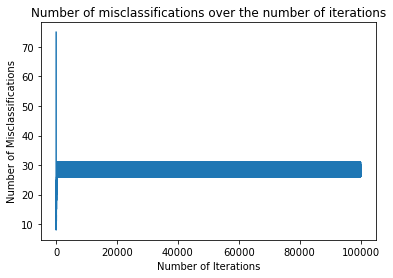

In [22]:
plt.title('Number of misclassifications over the number of iterations')
plt.plot(np.arange(0,iteration),plotData)
plt.xlabel("Number of Iterations")
plt.ylabel("Number of Misclassifications")
plt.show()

# Answer(c) The plot between the data and the final hypothesis

(-30.0, 20.0)

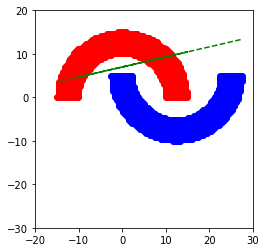

In [23]:
#Visualizing the linearly separable dataset
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.scatter(xs_red, ys_red, color='red')
plt.scatter(xs_blue,ys_blue, color='blue')
m = -(weights[1]/weights[2])
c = -(weights[0]/weights[2])
plt.plot( x_train, m*x_train + c ,'g--')
plt.xlim([-20, 30])
plt.ylim([-30, 20])

# Answer (d) Linear regression

In [24]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
weights_linear_regression = reg.coef_
l = []
for i in weights_linear_regression:
    l.append(i)
print(weights_linear_regression)

[ 0.         -0.02335229  0.10002409]


(-30.0, 20.0)

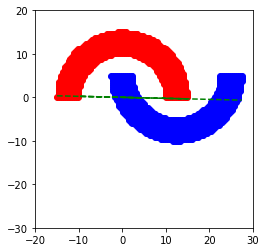

In [25]:
#Visualizing the linearly separable dataset
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

plt.scatter(xs_red, ys_red, color='red')
plt.scatter(xs_blue,ys_blue, color='blue')
m = weights_linear_regression[1]
c = weights_linear_regression[0]
plt.plot( x_train, m*x_train + c ,'g--')
plt.xlim([-20, 30])
plt.ylim([-30, 20])

# Answer (d) It is seen that the linear regression offers better results as opposed to PLA, in terms of speed and fit